Tutorial from https://towardsdatascience.com/build-and-deploy-your-first-machine-learning-web-app-e020db344a99

## Objectives: 
- Develop a machine learning pipeline and train models using PyCaret.
- Build a simple web app using a Python framework called ‘Flask’.
- Deploy a web app on ‘Heroku’ and see your model in action.

In [1]:
from pycaret.regression import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment No. 1

In [7]:
s = setup(data, target = 'charges', session_id = 123)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


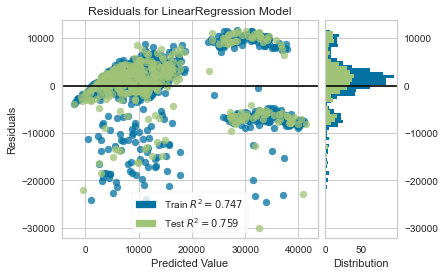

In [8]:
# Model Training and Validation 
lr_1 = create_model('lr')

# plot residuals of trained model
plot_model(lr_1, plot = 'residuals')

# Experiment No. 2

In [2]:
r2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True,
           feature_interaction=True,
           bin_numeric_features= ['age', 'bmi'])

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


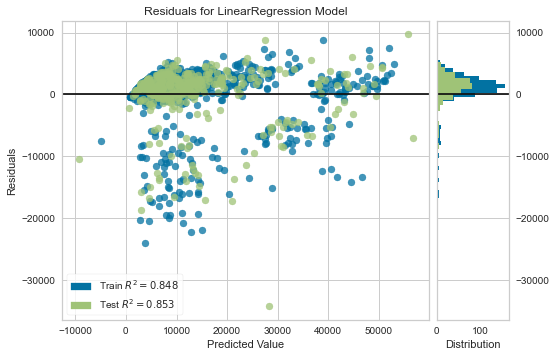

In [3]:
# Model Training and Validation 
lr_2 = create_model('lr')

# plot residuals of trained model
plot_model(lr_2, plot = 'residuals')

In [5]:
deployment = load_model('insurance_model')
deployment

Transformation Pipeline and Model Sucessfully Loaded


[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels...
                 ('rem_outliers', Empty()), ('cluster_all', Empty()),
                 ('dummy', Dummify(target='charges')), ('fix_perfect', Empty()),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs',
          

In [ ]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())